In [18]:
import psycopg2
#from modulos.clearText import cleaner
from modulos.teste import *
import pandas as pd

rootPath = 'dataset_txt/educacao/'
paths = getFilesByType(rootPath, 'txt')
textos = []
con = psycopg2.connect(host='localhost', database='topicos_ii', user='postgres', password='postgres')
cursor = con.cursor()

for p in paths:
    texto = open(rootPath + p, 'r', encoding='utf-8').read()
    #texto = texto.replace("'", '')
    texto = cleaner(texto)
    sql = "insert into database_text values (default, 'educacao_clear', '" + texto +"')"
    cursor.execute(sql)
    con.commit()
paths.sort()
con.close()


In [46]:
import pandas as pd

con = psycopg2.connect(host='localhost', database='topicos_ii', user='postgres', password='postgres')
df = pd.read_sql_query("select * from database_text where classe like '%_clear'",con=con)


In [47]:
from io import StringIO

col = ['classe', 'narrativa']
df = df[col]

df = df[pd.notnull(df['narrativa'])]
df.columns = ['classe', 'narrativa']
df['categoria_id'] = df['classe'].factorize()[0]
categoria_id_df = df[['classe', 'categoria_id']].drop_duplicates().sort_values('categoria_id')
categoria_para_id = dict(categoria_id_df.values)
id_para_categoria = dict(categoria_id_df[['categoria_id', 'classe']].values)


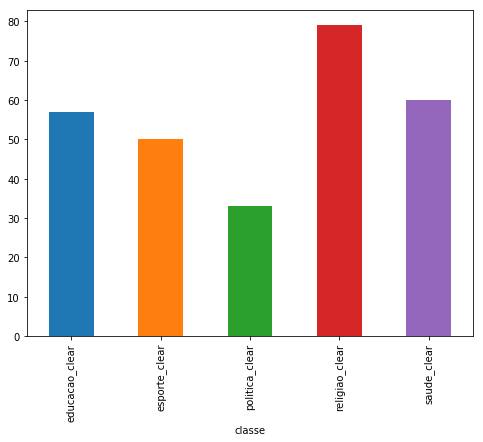

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
df.groupby('classe').narrativa.count().plot.bar(ylim=0)
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['narrativa'], df['classe'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [50]:
texto = texto = "escol part vai vot câm nest quartaest prev quartaf paut câm deput vot projet lei escol part pl comiss espec cri avali projet vai vot parec rela deput flav pscsp apresent text substitu oit projet discorr sobr temá tramit conjunto propost prev cad sal aul ca (...)"
print(clf.predict(count_vect.transform([texto])))

['educacao_clear']


In [51]:
texto = "ano nov vem aíam vc sent paz vc faz saúd depend algum hábit quer permit permit sent nov sab nov am nov corp nov boc nov emoç paixõesp velh além histór"
print(clf.predict(count_vect.transform([texto])))

['saude_clear']


In [52]:
texto = "ney franc destac evoluç goi turn prev jog dur contr ponte vid goi mud complet turn ganh atléticog oit rod tim esmeraldin som prim vitór campeonat brasil aind amarg zon rebaix pont atrás líd fortal fic derrot pont pret campinasnest sext venc macac olímp ver (...)"
print(clf.predict(count_vect.transform([texto])))

['esporte_clear']


In [57]:
texto = 'Cumprindo tabela na Série B, Guarani busca recuperar o "bom" futebol e o caminho da vitória Equipe, que não vence a cinco jogos, terá três alterações para o duelo com o Coritiba'
texto = cleaner(texto)
print(clf.predict(count_vect.transform([texto])))

['esporte_clear']


In [59]:
texto = 'As igrejas tem buscado desenvolver a religiosidade das pessoas'
texto = cleaner(texto)
print(clf.predict(count_vect.transform([texto])))

['religiao_clear']


In [63]:
texto = 'As eleições presidenciais de 2018 foram acirradas as pessoas votaram com muita convicção em seus candidatos. Os ânimos estavam exaltados e muitas confusões se sucederam'
texto = cleaner(texto)
print(clf.predict(count_vect.transform([texto])))

['politica_clear']
